/var/folders/s6/4wdnb9rx1cl3r28sklncyvs00000gs/T/ipykernel_97642/3270949868.py:9: RuntimeWarning: divide by zero encountered in log10
  HyMAG=np.array([np.log10(np.linalg.norm(ii)) for ii in Hy])


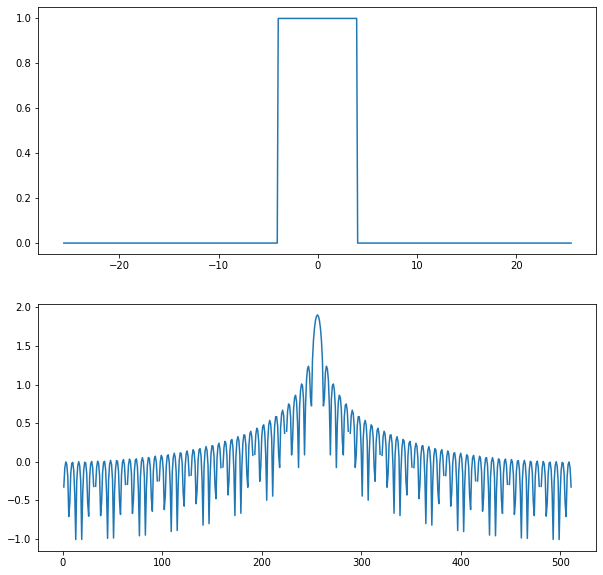

In [3]:
#plot 1D Sky View function and its fft (which is the interference pattern)
#
# 
import numpy as np
from matplotlib import pyplot as plt
x=np.arange(-25.6,25.6,0.1,dtype=float)
y=np.zeros(512)
y[np.abs(x)<4]=1.0
fig,ax=plt.subplots(2,1,figsize=(10,10))
ax[0].plot(x,y)
Hy=np.fft.fftshift(np.fft.fft(np.fft.ifftshift(y)))
HyMAG=np.array([np.log10(np.linalg.norm(ii)) for ii in Hy])
#HyMAG=np.array([np.linalg.norm(ii) for ii in Hy])
ax[1].plot(HyMAG)



/var/folders/s6/4wdnb9rx1cl3r28sklncyvs00000gs/T/ipykernel_97642/277132273.py:14: RuntimeWarning: divide by zero encountered in log10
  HyyMAG=np.array([[np.log10(np.linalg.norm(ii)) for ii in jj] for jj in Hyy])


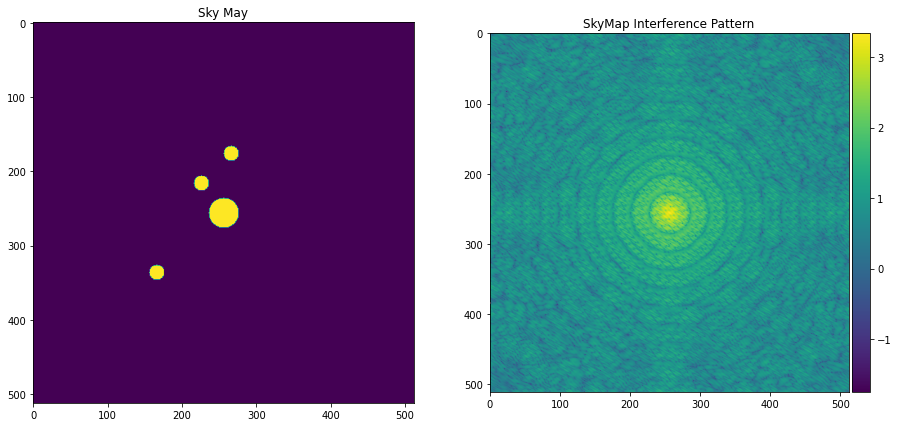

In [30]:
# Create Sky view and show FFT of sky.

from mpl_toolkits.axes_grid1 import make_axes_locatable
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

stepSize=0.1

dot=lambda mx,my,r,s,o : np.array([[0. if ((x+o[0])**2+(y+o[1])**2)>(r*r) else 1. for x in np.arange(-mx,mx,s)] for y in np.arange(-my,my,s)])
yy=dot(25.6,25.6,2.,stepSize,(0.,0.)) + dot(25.6,25.6,1.,stepSize,(3.,4.)) + dot(25.6,25.6,1.,stepSize,(-1.,8.))+ dot(25.6,25.6,1.,stepSize,(9.,-8.))
Hyy=calculate_2dft(yy)
HyyMAG=np.array([[np.log10(np.linalg.norm(ii)) for ii in jj] for jj in Hyy])

fig,ax=plt.subplots(1,2,figsize=(15,15))
#ax[0].imshow(yy)
im=[ax[jjj].imshow(data) for jjj,data in enumerate([yy,HyyMAG])]
[ax[jjj].set_title(data) for jjj,data in enumerate(["Sky May","SkyMap Interference Pattern"])]

# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1], cax=cax, orientation='vertical')


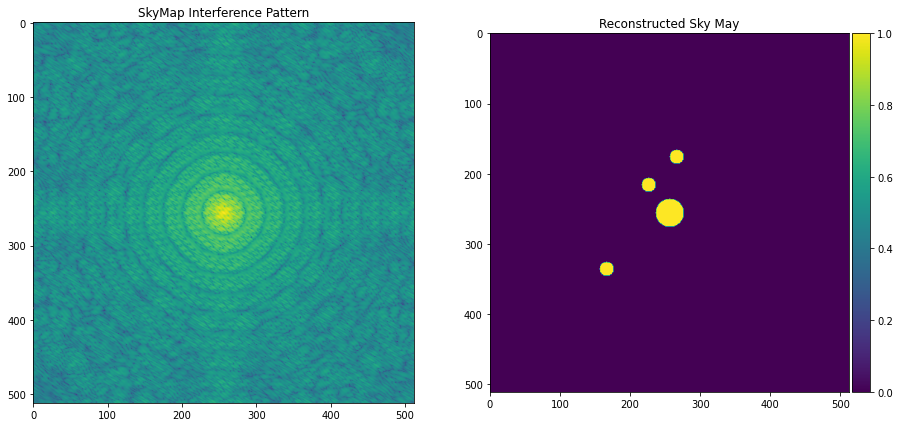

In [32]:
#INVERT the interference pattern back to original

def calculate_2dift(input):
    ft = np.fft.fftshift(input)
    ft = np.fft.ifft2(ft)
    return np.fft.ifftshift(ft)

BackHyyMAG=calculate_2dift(Hyy)
fig,ax=plt.subplots(1,2,figsize=(15,15))
#ax[0].imshow(yy)
im=[ax[jjj].imshow(data) for jjj,data in enumerate([HyyMAG,BackHyyMAG.real])]
[ax[jjj].set_title(data) for jjj,data in enumerate(["SkyMap Interference Pattern","Reconstructed Sky May"])]

# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1], cax=cax, orientation='vertical')



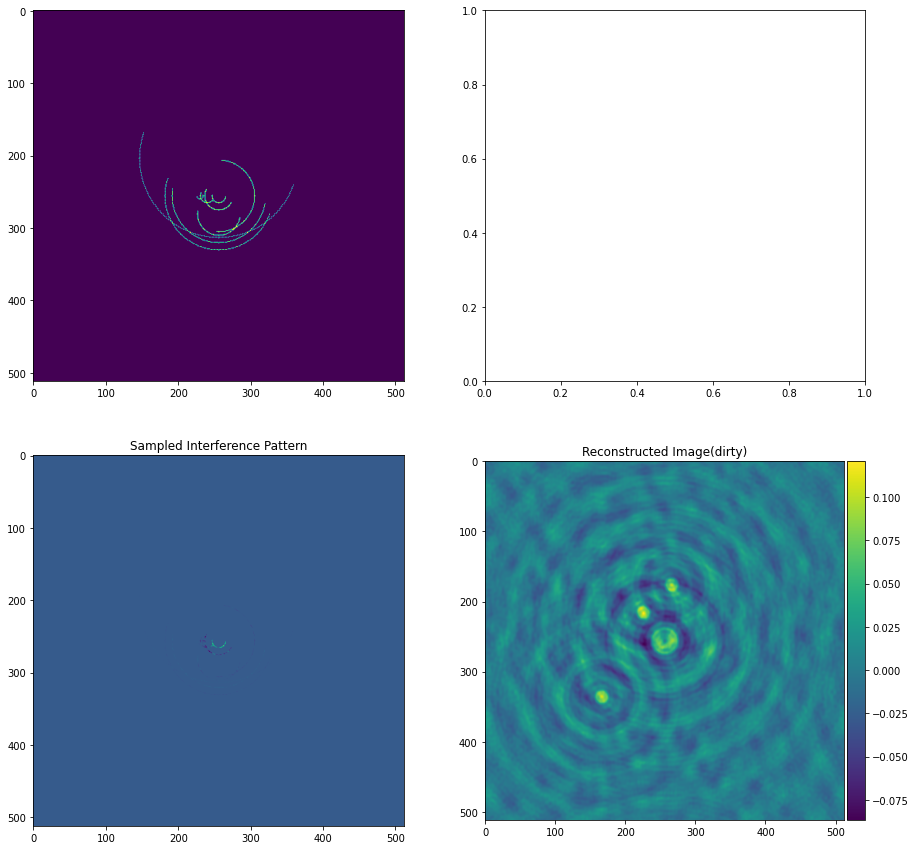

In [40]:
#implement a sampling function which samples part of the interference pattern.
#
# ifft the sampled sky view gives the dirty image of the sky 
#
import random
rotMat = lambda rot:np.matrix([[np.cos(rot/57.295779513),-np.sin(rot/57.295779513)],[np.sin(rot/57.295779513),np.cos(rot/57.295779513)]])
rotate = lambda rot,xy:tuple((np.int16(rotMat(rot)*np.matrix(xy).transpose())).transpose().tolist()[0])
r=((10,60,0.5,0.47),(30,80,0.55,0.5),(110,70,0.4,0.5),(5,110,0.5,0.45),(20,60,0.5,0.5),(50,175,0.5,0.5),
    (65,80,0.5,0.5),(20,60,0.5,0.5),(75,70,0.5,0.5),(20,60,0.5,0.5),(50,175,0.5,0.5),(10,80,0.5,0.5),(20,60,0.5,0.5))
t=180
sample=0.0*Hyy
for ll in r:
    for lll in [rotate(ll[1]-t,(ll[0],0)) for t in range(t)]:
        # sample[lll[0]+len(Hyy[0])//2][lll[1]+len(Hyy)//2]=1.0  #Hyy[lll[0]+len(Hyy[0])//2][lll[1]+len(Hyy)//2]
        sample[int(lll[0]+len(Hyy[0])*ll[2])][int(lll[1]+len(Hyy)*ll[3])]=1.0  #Hyy[lll[0]+len(Hyy[0])//2][lll[1]+len(Hyy)//2]
fig,ax=plt.subplots(2,2,figsize=(15,15))
im=[[1,2],[0,0]]
sampleOut=sample*Hyy
BackHyyMAG=calculate_2dift(sampleOut)
im[0][0]=ax[0][0].imshow(sample.real)
im[1][0]=ax[1][0].imshow(sampleOut.real)
im[1][1]=ax[1][1].imshow(BackHyyMAG.real)
[ax[1][jjj].set_title(data) for jjj,data in enumerate(["Sampled Interference Pattern","Reconstructed Image(dirty)"])]
# #ax[0].imshow(yy)
# im=[ax[jjj].imshow(data) for jjj,data in enumerate([sample,BackHyyMAG.real])]
# plt.colorbar(im[1],ax=ax[1])
divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im[1][1], cax=cax, orientation='vertical')



In [46]:
Hyy[sample.real>0]

array([ 8.11872776e+00-1.04250912e+01j,  9.85994315e+00-4.71145560e+00j,
        9.87539805e+00-2.15412413e+00j,  9.09123417e+00-8.24761483e+00j,
        1.15351702e+01-3.41537013e+00j,  7.82181365e+00+1.95757346e+00j,
        3.94309855e+00-9.92282457e-01j, -1.29487700e+00+3.31083343e+00j,
       -4.43431945e+00+3.56700265e+00j, -2.00142559e+00-4.68322684e-01j,
       -7.76493360e+00+4.49432020e+00j, -1.90605978e+01+6.62288583e+00j,
       -1.09215164e+01-4.63853432e+00j, -1.82305195e+01-1.25530043e+00j,
       -2.18326203e+01-1.21439950e+00j, -8.91785059e-01-1.13439443e+01j,
       -5.55808942e+00-7.85687173e-02j, -2.50304505e+01+1.04118183e+01j,
       -8.40332509e+00-3.21060154e+00j, -9.40225350e+00-9.02922911e+00j,
       -6.49075977e+00-8.73204647e+00j, -2.06255146e+01-4.69080942e+00j,
       -4.29514166e+00-7.78989780e+01j,  1.24083443e+01-3.49699697e+01j,
       -1.05289389e+01+4.36468112e+00j, -4.86756502e+01+9.77586441e+00j,
       -6.55164395e+01-1.13604085e+01j, -5.21589069